# Importing necessary libraries

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import logging

# Calculation methods

In [180]:
def method_1(x, h, f):
    return 1.0 * (f(x+h) - f(x)) / h

def method_2(x, h, f):
    return 1.0 * (f(x) - f(x - h)) / h

def method_3(x, h, f):
    return 1.0 * (f(x + h) - f(x - h)) / (2 * h)

def method_4(x, h, f):
    return 1.0 * 4 / 3 * method_3(x, h, f) - 1.0 * 1 / 3 * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h)

def method_5(x, h, f):
    return 1.0 * 3 / 2 * method_3(x, h, f) - 1.0 * 3 / 5 * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h) + \
    1.0 * 1 / 10 * (f(x + 3 * h) - f(x - 3 * h)) / (6 * h)

# Differentiated functions

In [181]:
def my_sin(x):
    return np.sin(x * x)

def my_cos(x):
    return np.cos(np.sin(x))

def my_exp(x):
    return np.exp(np.sin(np.cos(x)))

def my_log(x):
    return np.log(x + 3)

def my_pow(x):
    return np.float_power(x + 3, 0.5)

# Analytical expressions for derivatives

In [182]:
def my_sin_derivative(x):
    return 2 * x * np.cos(x * x)

def my_cos_derivative(x):
    return -1 * np.sin(np.sin(x)) * np.cos(x)

def my_exp_derivative(x):
    return my_exp(x) * np.cos(np.cos(x)) * (-1) * np.sin(x)

def my_log_derivative(x):
    return 1.0 / (x + 3)

def my_pow_derivative(x):
    return 1.0 / 2 * np.float_power(x + 3, -0.5)

# Creating steps array

In [183]:
def get_step(n):
    return 1.0 * 2 / np.float_power(2, n)

def differentiate_with_steps(derivative_method, func, steps, point):
    return np.array([derivative_method(point, step, func) for step in steps])

def calc_errors(method, function, steps, point):
    calculated_array = differentiate_with_steps(method, function, steps, point)
    return [np.abs(calculated - analytical) for calculated in calculated_array]

def plot_setup(name):
    plt.figure(figsize=[10,5], dpi=100)
    plt.title('Errors for $' + name + '$')
    plt.xlabel('h')
    plt.ylabel('error')

def plot_print_errors(method, function, steps, point, color):
    errors = calc_errors(method, function, steps, point)
    plt.loglog(steps, errors, color)
    
def plot_all(function, steps, point):
    plot_print_errors(method_1, function, steps, point, 'red')
    plot_print_errors(method_2, function, steps, point, 'green')
    plot_print_errors(method_3, function, steps, point, 'blue')
    plot_print_errors(method_4, function, steps, point, 'black')
    plot_print_errors(method_5, function, steps, point, 'yellow')
    
def show_legend():
    method_1 = mpatches.Patch(color='red', label='method_1')
    method_2 = mpatches.Patch(color='green', label='method_2')
    method_3 = mpatches.Patch(color='blue', label='method_3')
    method_4 = mpatches.Patch(color='black', label='method_4')
    method_5 = mpatches.Patch(color='yellow', label='method_5')
    plt.legend(handles=[method_1, method_2, method_3, method_4, method_5])

steps = np.fromfunction(get_step, (21,))


point = 4.0 # the point where we calculate all derivatives

# Differentiating sin

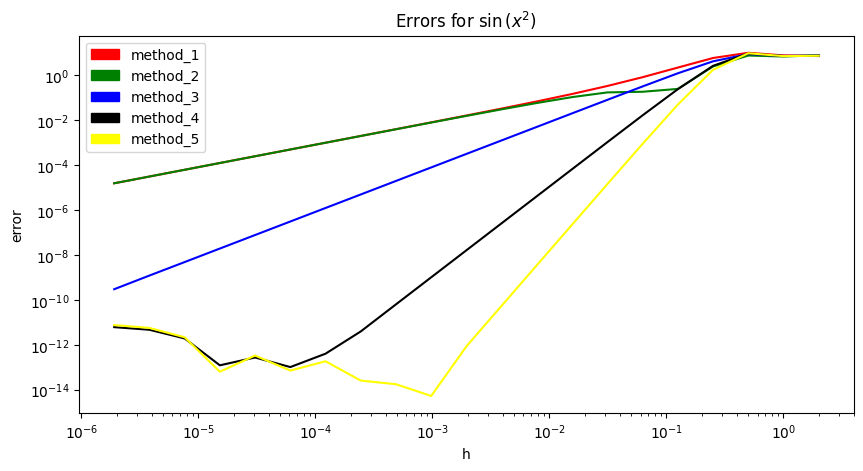

In [184]:

analytical = my_sin_derivative(point)

plot_setup('\sin{(x^{2})}')
plot_all(my_sin, steps, point)
show_legend()


# Differentiating my_cos

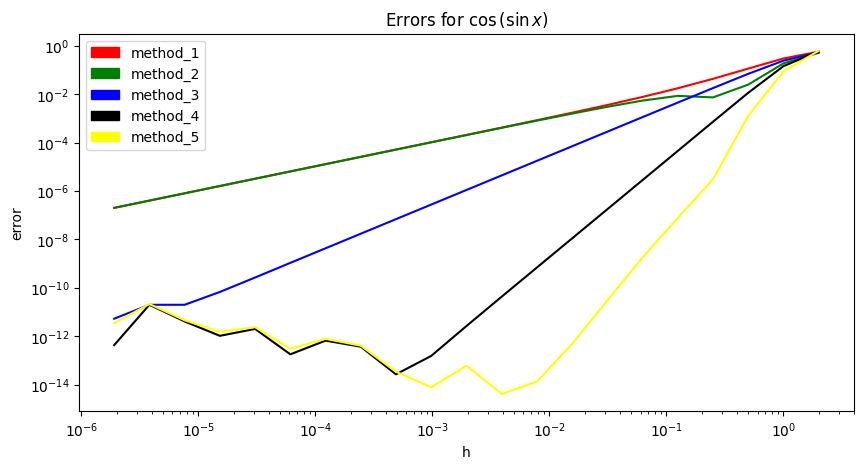

In [185]:
analytical = my_cos_derivative(point)

plot_setup('\cos{(\sin{x})}')
plot_all(my_cos, steps, point)
show_legend()

# Differentiating my_exp

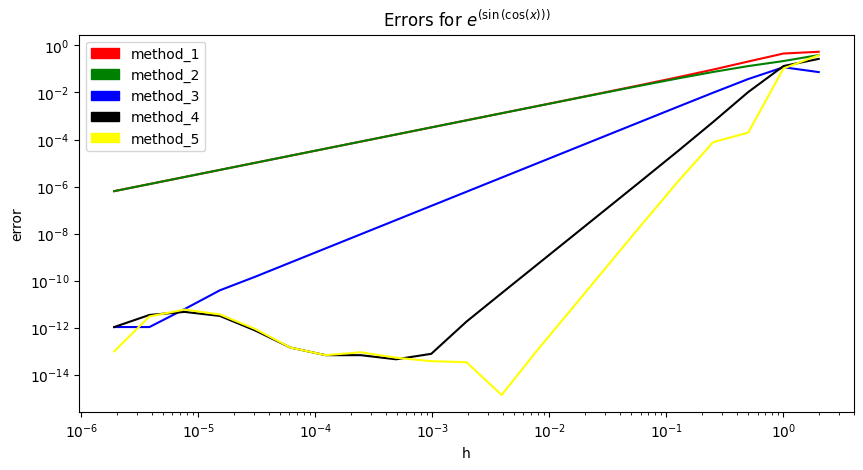

In [186]:
analytical = my_exp_derivative(point)

plot_setup('e^{{(\sin{(\cos({x})})})}')
plot_all(my_exp, steps, point)
show_legend()

# Differentiating my_log

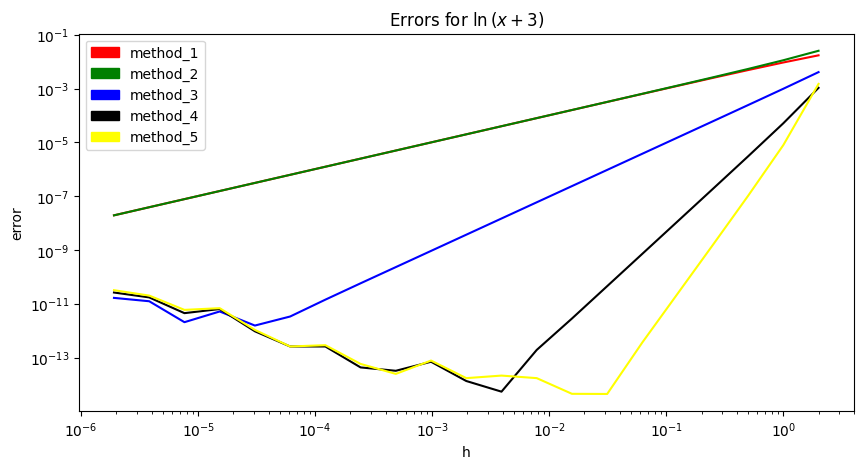

In [187]:
analytical = my_log_derivative(point)

plot_setup('\ln{(x + 3)}')
plot_all(my_log, steps, point)
show_legend()